## City vs Bayern - player's pass and carry values across two games (Nolan chart)

I was wondering : in the recent two-leg games between Man.City and Bayern Munchen for the Champions League knockouts , which
players **added the most (progressive) value with their carries and passes** ? Were there any players that excelled in both categories at once , thus earning the role of **"_elite progressor_"** ?

This is the question we are trying to answer today.The visualization we are going to use is called a **"Nolan plot"** or
**"Nolan cart"** and it looks something like this _(taken straight from Wikipedia)_ :

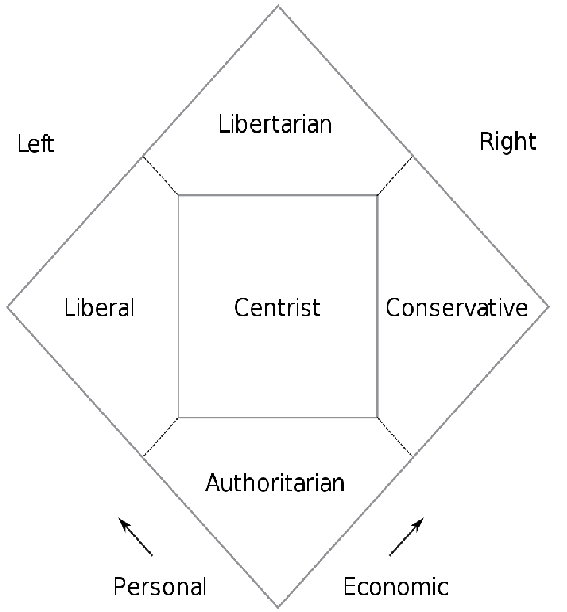

We are going at it using **pandas** for data wrangling and **matplotlib** for the plotting.Since the Nolan plot is diamond-shaped we're going to have to _"tilt"_ our figure a bit , and for that we're going to use the code straight from the **AxisArtist/floatingAxes** documentation page [you can find it here.](https://matplotlib.org/stable/gallery/axisartist/demo_floating_axes.html#sphx-glr-gallery-axisartist-demo-floating-axes-py)

Let's go ahead and import the libraries :

In [1]:
import pandas as pd # for the wrangling

# for the viz
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import numpy as np
import mpl_toolkits.axisartist.angle_helper as angle_helper
from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist.grid_finder import (FixedLocator, MaxNLocator,
                                                 DictFormatter)

In [2]:
# you can find the excel file in my repo on Github
df=pd.read_excel("city_vs_bayern_stats.xlsx")

In [3]:
df=df.drop("Unnamed: 0",axis=1)

A quick look on the df : using data from FBref i used an Excel spreadsheet to create my own simple metrics : the columns **"pass_value"** _(which is progressive passes + passes to oppo's box)_ and **"carr_value"** _(which is progressive carries + carries to oppo's box)_.

In [4]:
# a quick look on what's inside
df.head(5)

,player_name,pass_value,carr_value
0,Sane,6,10
1,Haaland,2,7
2,Pavard,13,1
3,Grealish,7,9
4,Silva,9,6


In [5]:
# in excel i filtered for players that played > 25 minutes across both legs
print("there are :" , df.shape[0] , "players in the dataset after filtering")

there are : 24 players in the dataset after filtering


Although we could do without normalization (_the ranges are not very spread-out to begin with_) since we're using a floatingAxes object and not a regular axis i prefer that for plotting purposes all my values range from 0 to 1 , so let's do **simple feature scaling**  :

In [6]:
#x_new=x_old / x_old_max
df["scaled_pass_value"]=df["pass_value"] / df["pass_value"].max()
df["scaled_carry_value"]=df["carr_value"] / df["carr_value"].max()

In [7]:
df.head(3)

,player_name,pass_value,carr_value,scaled_pass_value,scaled_carry_value
0,Sane,6,10,0.24,0.526316
1,Haaland,2,7,0.08,0.368421
2,Pavard,13,1,0.52,0.052632


Now the next part is purely to avoid clutter in the viz :
- I create "annot_x" and "annot_y" columns subtracting just a bit from my original vals - this is where the text label will go ,
- df_annot is a dataframe containing the players whose labels i can afford to put in the plot without it becoming too _cluttered_

In [8]:
df["annot_x"]=df["scaled_pass_value"] - 0.06
df["annot_y"]=df["scaled_carry_value"] -0.03

In [9]:
the_annotated_players = ["KDB","Coman","Kimmich","Haaland","Sane","Davies","Akanji","Rodri","Grealish","Musiala",
                         "Gundo","Ake","Silva","Upamecano"]

In [10]:
df_annot=df[df["player_name"].isin(the_annotated_players)]

In [11]:
df_annot

,player_name,pass_value,carr_value,scaled_pass_value,scaled_carry_value,annot_x,annot_y
0,Sane,6,10,0.24,0.526316,0.18,0.496316
1,Haaland,2,7,0.08,0.368421,0.02,0.338421
3,Grealish,7,9,0.28,0.473684,0.22,0.443684
4,Silva,9,6,0.36,0.315789,0.30,0.285789
5,Gundo,9,1,0.36,0.052632,0.30,0.022632
6,Rodri,14,2,0.56,0.105263,0.50,0.075263
8,Ake,6,2,0.24,0.105263,0.18,0.075263
10,Akanji,11,4,0.44,0.210526,0.38,0.180526
11,Coman,17,19,0.68,1.000000,0.62,0.970000
13,Kimmich,25,1,1.00,0.052632,0.94,0.022632


Now with some basic .loc filtering let's put the players into **bins** :
- a bin called "normals_second_filter" with players scoring **below avg in both pass and carries** ,
- a bin called "the_passers" for those scoring **above avg in passing value** ,
- a bin called "the_carriers" with those scoring **above avg in carry value** ,
- finally the "elite_progressor" bin containing those who scored above avg in **both carry and pass values**.

In [108]:
pass_avg=df["scaled_pass_value"].mean()
carry_avg=df["scaled_carry_value"].mean()

In [109]:
print("the passing average is :", pass_avg , "and the carry average is :" , carry_avg)

the passing average is : 0.3283333333333333 and the carry average is : 0.20614035087719296


In [110]:
normals_first_filter = df.loc[df["scaled_pass_value"] < pass_avg]

In [112]:
normals_first_filter.head(2)

,player_name,pass_value,carr_value,scaled_pass_value,scaled_carry_value,annot_x,annot_y
0,Sane,6,10,0.24,0.526316,0.18,0.496316
1,Haaland,2,7,0.08,0.368421,0.02,0.338421


In [113]:
normals_second_filter = normals_first_filter.loc[normals_first_filter["scaled_carry_value"] < carry_avg]

In [114]:
normals_second_filter.head(2)

,player_name,pass_value,carr_value,scaled_pass_value,scaled_carry_value,annot_x,annot_y
7,Stones,1,0,0.04,0.000000,-0.02,-0.030000
8,Ake,6,2,0.24,0.105263,0.18,0.075263


In [115]:
carriers_first = df.loc[df["scaled_carry_value"] > carry_avg]

In [116]:
carriers_second = carriers_first.loc[carriers_first["scaled_pass_value"] < pass_avg]

In [118]:
carriers_second.head(2)

,player_name,pass_value,carr_value,scaled_pass_value,scaled_carry_value,annot_x,annot_y
0,Sane,6,10,0.24,0.526316,0.18,0.496316
1,Haaland,2,7,0.08,0.368421,0.02,0.338421


In [119]:
passers_first = df.loc[df["scaled_pass_value"] > pass_avg]

In [120]:
passers_second=passers_first.loc[passers_first["scaled_carry_value"] < carry_avg]

In [122]:
passers_second.head(2)

,player_name,pass_value,carr_value,scaled_pass_value,scaled_carry_value,annot_x,annot_y
2,Pavard,13,1,0.52,0.052632,0.46,0.022632
5,Gundo,9,1,0.36,0.052632,0.30,0.022632


In [123]:
elite_progressor = df.loc[(df["scaled_pass_value"] > pass_avg) & (df["scaled_carry_value"] > carry_avg)]

In [125]:
elite_progressor.head(2)

,player_name,pass_value,carr_value,scaled_pass_value,scaled_carry_value,annot_x,annot_y
4,Silva,9,6,0.36,0.315789,0.30,0.285789
10,Akanji,11,4,0.44,0.210526,0.38,0.180526


In [126]:
df_length=len(df["player_name"])

In [127]:
filtered_lengths = len(normals_second_filter) + len(elite_progressor) + len(passers_second) + len(carriers_second)

In [28]:
# making sure i didn't leave anybody out ...
print (df_length , filtered_lengths)

24 24


And now time for the viz :

In [29]:
# Fixing random state for reproducibility
np.random.seed(19680801)


def setup_axes1(fig, rect):
    """
    A simple one.
    """
    tr = Affine2D().rotate_deg(45)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(0,1,0,1),# setting x and y limits
        grid_locator1=MaxNLocator(nbins=10),# setting the bins for how many lines the grid is going to have 
        grid_locator2=MaxNLocator(nbins=10))

    ax1 = fig.add_subplot(
        rect, axes_class=floating_axes.FloatingAxes, grid_helper=grid_helper)
    
    
    ax1.set_facecolor("#313332")

    aux_ax = ax1.get_aux_axes(tr)
    
    for key in ax1.axis: #removing initial axis ticks and ticklabels
        ax1.axis[key].set_visible(False)
 
    ax1.grid(True,which="major",color="white",linestyle="-",lw=0.4,alpha=0.60,zorder=1)
    

    return ax1, aux_ax

In [30]:
# since we removed initial axes , we are gonna redraw the boundaries
#setting the coords for that
edge_x=[0,1,1,0,0]
edge_y=[0,0,1,1,0]

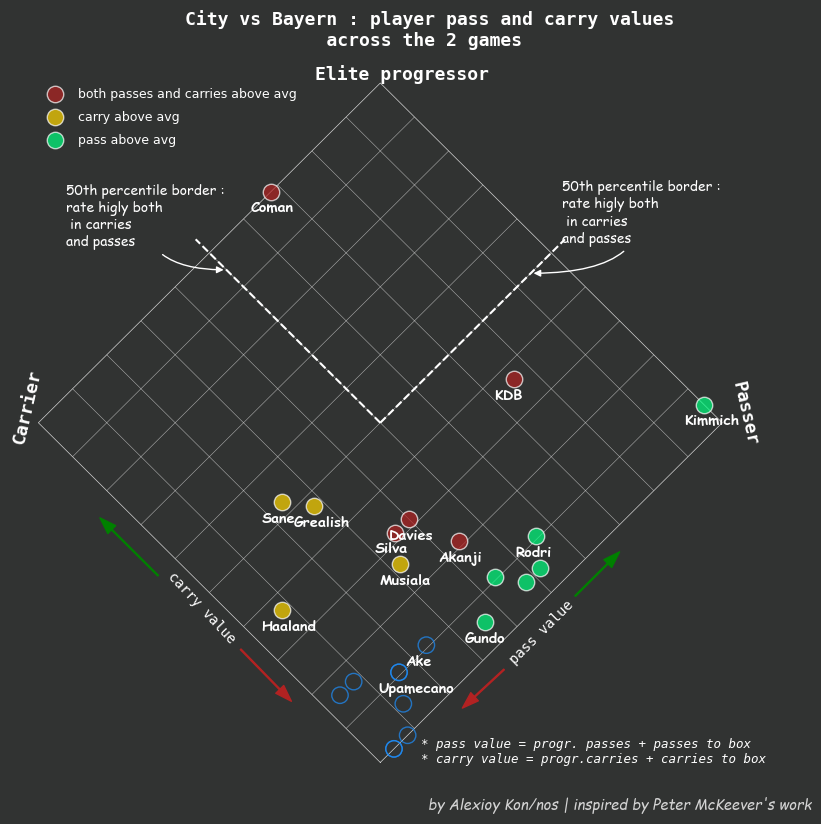

In [107]:

fig = plt.figure(figsize=(9,9))
fig.set_facecolor("#313332")
fig.subplots_adjust(wspace=0.20)

ax1, aux_ax1 = setup_axes1(fig, 111)
#redrawing the plot boundaries using edge_x and edge_y
aux_ax1.plot(edge_x,edge_y,linestyle="-" , linewidth = 0.5 , color = "lightgrey",zorder=1)

#plotting the points
aux_ax1.scatter(elite_progressor["scaled_pass_value"],elite_progressor["scaled_carry_value"],s=140,color="firebrick",edgecolor="white",alpha=0.70,zorder=2,label="both passes and carries above avg")
aux_ax1.scatter(carriers_second["scaled_pass_value"],carriers_second["scaled_carry_value"],s=140,color="gold",edgecolor="white",alpha=0.7,zorder=2,label="carry above avg")
aux_ax1.scatter(passers_second["scaled_pass_value"],passers_second["scaled_carry_value"],s=140,color="springgreen",edgecolor="white",alpha=0.70,zorder=2,label="pass above avg")
aux_ax1.scatter(normals_second_filter["scaled_pass_value"],normals_second_filter["scaled_carry_value"],s=140,edgecolor="dodgerblue",facecolor="none",marker="o",alpha=0.7,zorder=2)

#adding players' names
for index,row in df_annot.iterrows():
    aux_ax1.annotate(row.player_name, xy=(row.annot_x, row.scaled_carry_value),color="white",fontsize=10.4,fontweight="bold",fontfamily="cursive")
ax1.legend(loc=2,fontsize=9,labelcolor="white",frameon=False,labelspacing=0.8)

# the rest is pretty self-explanatory , customization and making it look okay
aux_ax1.annotate("Elite progressor",xy=(1,1),xytext=(0.91,1.1),color="white",fontsize=13,fontweight="bold",fontfamily="monospace")
aux_ax1.annotate("Carrier",xy=(0.04,1),xytext=(-0.07,1.013),color="white",fontsize=13,fontweight="bold",fontfamily="monospace",rotation=77)
aux_ax1.annotate("Passer",xy=(1,0),xytext=(0.98,-0.04),color="white",fontsize=13,fontweight="bold",fontfamily="monospace",rotation=283)
aux_ax1.annotate("50th percentile border :\nrate higly both\n in carries\nand passes",
                 xy=(0.50,0.95),xytext=(0.30,1.22),color="white",fontfamily="cursive",fontsize=10,fontweight="light",
                 arrowprops=dict(arrowstyle="-|>",color="white",connectionstyle="angle3"))

aux_ax1.annotate("50th percentile border :\nrate higly both\n in carries\nand passes",
                 xy=(0.94,0.50),xytext=(1.03,0.50),color="white",fontfamily="cursive",fontsize=10,fontweight="light",
                 arrowprops=dict(arrowstyle="-|>",color="white",connectionstyle="angle3"))
aux_ax1.vlines(x=0.5,ymin=0.5,ymax=1.04,linestyle="dashed",color="white")
aux_ax1.hlines(y=0.5,xmin=0.5,xmax=1.04,linestyle="dashed",color="white")
aux_ax1.annotate("carry value",xy=(-0.04,0.22),xytext=(-0.14,0.49),rotation=313,color="white",fontfamily="monospace",fontweight="light",
                arrowprops=dict(width=0.7,color="firebrick",headwidth=8))
aux_ax1.annotate("",xy=(-0.05,0.77),xytext=(-0.05,0.60),
                arrowprops=dict(width=0.7,color="green",headwidth=8))
aux_ax1.annotate("pass value",xy=(0.20,-0.04),xytext=(0.33,-0.04),rotation=45,color="white",fontfamily="monospace",fontweight="light",
                arrowprops=dict(width=0.7,color="firebrick",headwidth=8))
aux_ax1.annotate("",xy=(0.66,-0.04),xytext=(0.53,-0.04),
                arrowprops=dict(width=0.7,color="green",headwidth=8))
aux_ax1.text(0.77,1.34,"City vs Bayern : player pass and carry values\n             across the 2 games",fontsize=13,color="white",fontfamily="monospace",fontweight="bold")
aux_ax1.text(0.06,-0.06,
             "* pass value = progr. passes + passes to box\n* carry value = progr.carries + carries to box",
             fontsize=9,color="white",fontfamily="monospace",fontweight="light",fontstyle="italic")
aux_ax1.text(0,-0.14,
             "by Alexioy Kon/nos | inspired by Peter McKeever's work",ha="left",
             fontsize=10.5,color="lightgrey",fontfamily="cursive",fontweight="light",fontstyle="italic")
# plt.savefig("city_vs_bayern_nolan.png",dpi=170,bbox_inches="tight")

Main takeaways :
- Coman added the most progressive value to Bayern ,
- KDB and Kimmich were the risk-takers with their passing ,
- Sane and Grealish were the main ball-carriers while Haaland progressed the ball more in the 2nd leg ,
- Akanji and Davies may play as full-backs but they are attack-oriented , progressing the ball both with carries and passes.

_Shoutout to PeterMcKeever and Unar Sezer's work that provided the inspiration for the plot_